# Mashinsko Ucenje - LAB4

## 151027, Fisnik Limani

### DATASET: LETTER RECOGNITION
- https://archive.ics.uci.edu/ml/datasets/Letter+Recognition

DATASET INFORMATION:  
- Attribute characteristics: Integer  
- Associated Tasks: Classification  
- Number of instances: 20 000  
- Number of attributes: 16  
- Missing Values? No  

ATTRIBUTES INFROMATION:  
1. lettr capital letter (26 values from A to Z)
2. x-box horizontal position of box (integer)
3. y-box vertical position of box (integer)
4. width width of box (integer)
5. height height of box (integer)
6. onpix total # on pixels (integer)
7. x-bar mean x of on pixels in box (integer)
8. y-bar mean y of on pixels in box (integer)
9. x2bar mean x variance (integer)
10. y2bar mean y variance (integer)
11. xybar mean x y correlation (integer)
12. x2ybr mean of x * x * y (integer)
13. xy2br mean of x * y * y (integer)
14. x-ege mean edge count left to right (integer)
15. xegvy correlation of x-edge with y (integer)
16. y-ege mean edge count bottom to top (integer)
17. yegvx correlation of y-ege with x (integer)



# 1. IMPORTS

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Models
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from scipy import stats

from sklearn.preprocessing import MinMaxScaler

# 2. READING DATASET

In [93]:
data = pd.read_csv('letter-recognition.data')
data.head()

,letter,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


# 3. ANALYZING DATASET

### 3.1. CHECK NULL VALUES

In [94]:
data.isnull().sum()

letter    0
x-box     0
y-box     0
width     0
high      0
onpix     0
x-bar     0
y-bar     0
x2bar     0
y2bar     0
xybar     0
x2ybr     0
xy2br     0
x-ege     0
xegvy     0
y-ege     0
yegvx     0
dtype: int64

# 4. VISUALIZATIONS

### 4.1. PLOTTING THE BAR GRAPH TO VIEW THE COUNT OF EACH LETTER

[]

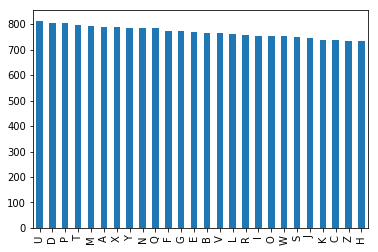

In [95]:
data['letter'].value_counts().plot.bar()
plt.plot()

## 4.2. WHOLE DATA HISTOGRAMS

In [96]:
feature_names = data.columns.tolist()[1:]
number_of_features = len(feature_names)

In [97]:
X = data.values[:, 1:]
y = data.values[:, 0]

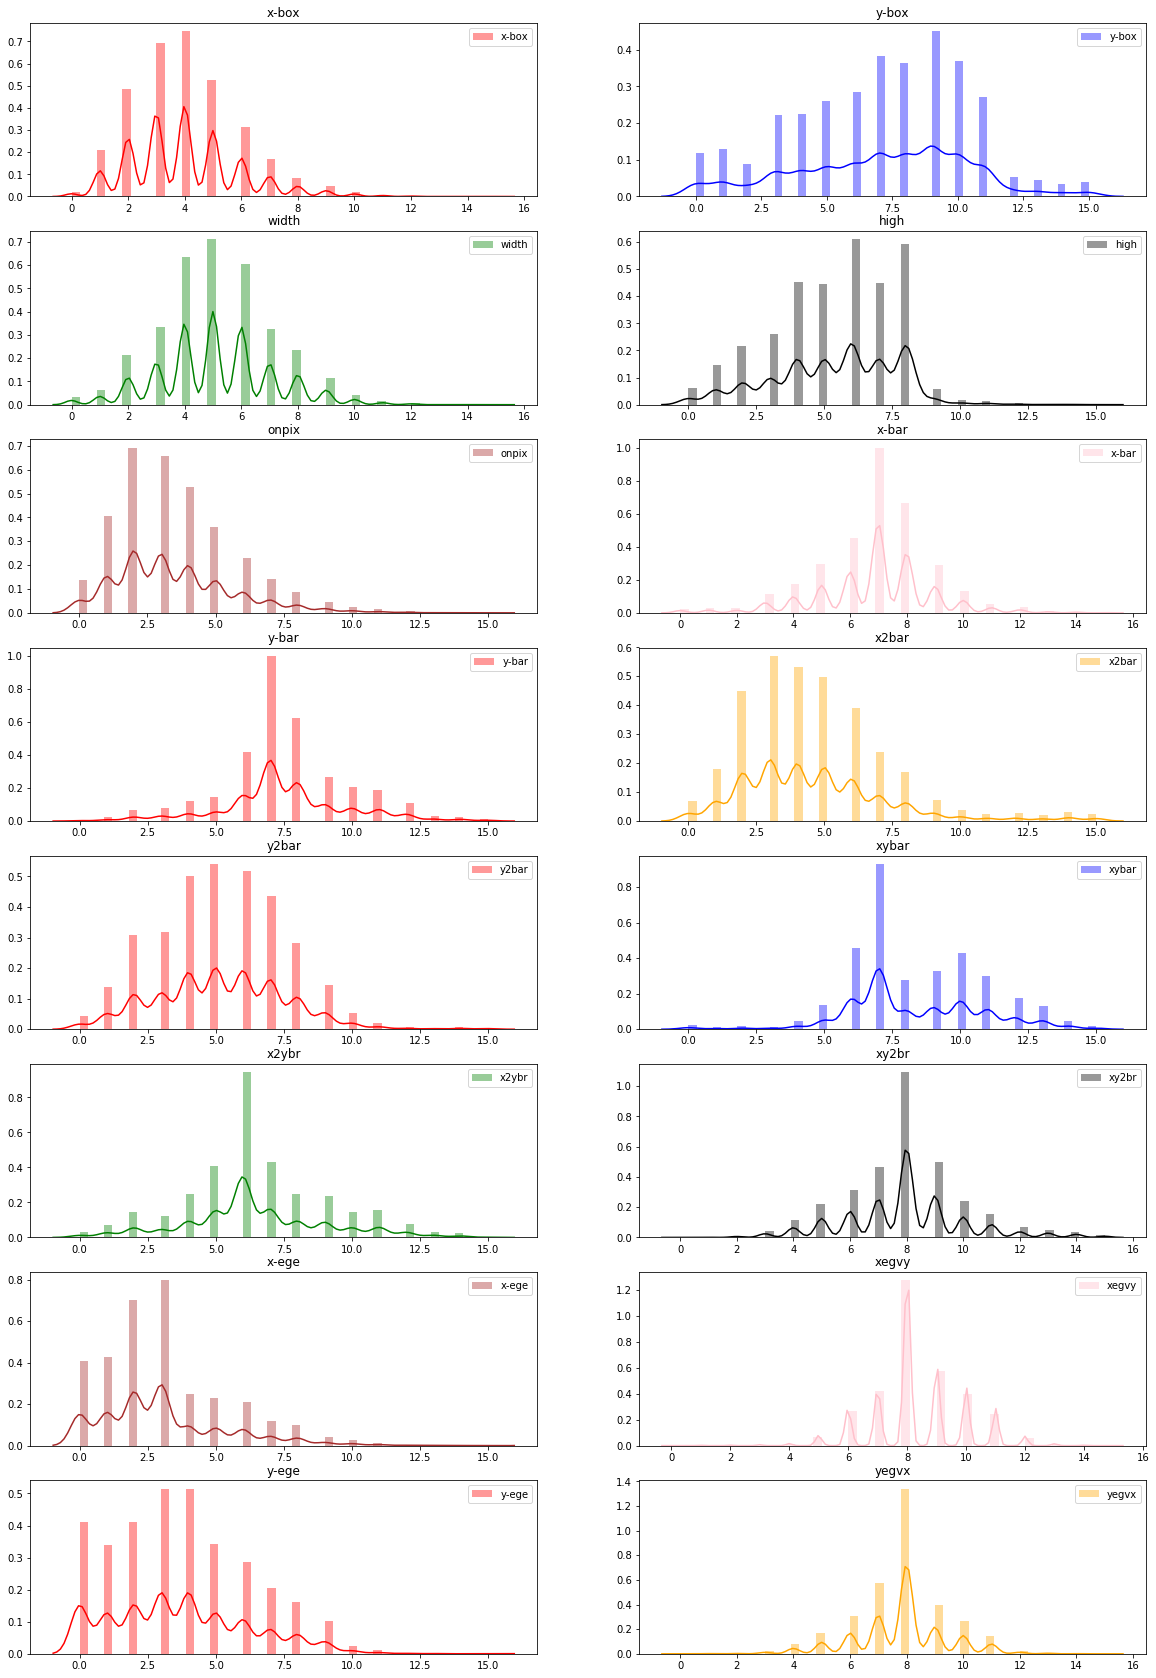

In [99]:
feature_colors = ['red', 'blue', 'green', 'black', 'brown', 'pink', 'red', 'orange', \
                   'red', 'blue', 'green', 'black', 'brown', 'pink', 'red', 'orange']

fig = plt.figure(figsize=(20, 30))
fig.subplots(nrows=8, ncols=2)
for feat_i in range(number_of_features): #For each feature, we have a new subplot
    ax = plt.subplot(8,2, feat_i+1)
    plt.title(feature_names[feat_i])
    column = list(X[:, feat_i])
    sns.distplot(column, label=feature_names[feat_i], color=feature_colors[feat_i]) #Once we have a specific feature, we draw the histogram of the feature's data (X[:,i] means we get the i'th column of X)
    plt.legend()
plt.show()

### 3.3. BETWEEN FEATURE DEPENDENCE

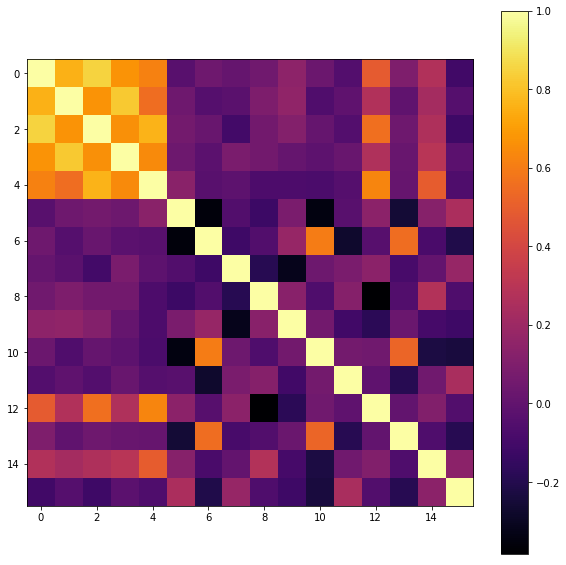

In [100]:
correlation_matrix = np.zeros((number_of_features,number_of_features))
for i in range(number_of_features): #We need a 4x4 matrix to represent the correlation matrix, where we set the value of Cij to be the correlation between the i'th and the j'th metric
    measure = X[:,i]
    for j in range(number_of_features):
        measure2 = X[:,j]
        corr, _ = stats.pearsonr(measure, measure2)
        correlation_matrix[i][j] = corr
fig = plt.figure(figsize = (10, 10))
plt.imshow(correlation_matrix, cmap = "inferno") #We can draw the matrix using imshow
plt.colorbar()
plt.show()

# 4. SPLITTING THE DATA INTO TARGET VARIABLE AND INDEPENDENT VARIABLES

In [101]:
X = data.iloc[:, 1 : -1]
y = data.iloc[:, 0]

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [103]:
print("X_train {}".format(X_train.shape))
print("y_train {}".format(y_train.shape))
print("X_test  {}".format(X_test.shape))
print("y_test  {}".format(y_test.shape))

X_train (16000, 15)
y_train (16000,)
X_test  (4000, 15)
y_test  (4000,)


# 5. CLASSIFICATION WITH DIFFERENT MODELS

## 5.1. LDA

In [104]:
lda = LinearDiscriminantAnalysis() #We initialize the model
lda.fit(X_train, y_train) #We fit the model to the training data X_train and the appropriate class labels y_train
y_pred = lda.predict(X_test) #We get the predictions of the test data X_test using the predict function
print("LDA accuracy:", accuracy_score(y_test, y_pred))
print("LDA precision:", precision_score(y_test, y_pred, average='weighted'))
print("LDA recall:", recall_score(y_test, y_pred, average='weighted'))

LDA accuracy: 0.6985
LDA precision: 0.710455816262497
LDA recall: 0.6985


## 5.2. QDA

In [105]:
qda = QuadraticDiscriminantAnalysis() #We initialize the model
qda.fit(X_train, y_train) #We fit the model to the training data X_train and the appropriate class labels y_train
y_pred = qda.predict(X_test) #We get the predictions of the test data X_test using the predict function
print("QDA accuracy:", accuracy_score(y_test, y_pred))
print("QDA precision:", precision_score(y_test, y_pred, average='weighted'))
print("QDA recall:", recall_score(y_test, y_pred, average='weighted'))

QDA accuracy: 0.869
QDA precision: 0.8713568401866107
QDA recall: 0.869


## 5.3. KNN

In [106]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("KNN accuracy:", accuracy_score(y_test, y_pred))
print("KNN precision:", precision_score(y_test, y_pred, average='weighted'))
print("KNN recall:", recall_score(y_test, y_pred, average='weighted'))

KNN accuracy: 0.95275
KNN precision: 0.9529371996002859
KNN recall: 0.95275


In [107]:
for n_neighbors in range(2,6):
    knn = KNeighborsClassifier(n_neighbors = n_neighbors)
    knn.fit(X_train, y_train)
    knn_predictions = knn.predict(X_test)
    acc = accuracy_score(y_test, knn_predictions)
    print('Accuracy for n_neighbors {} is : {}'.format(n_neighbors, acc * 100))

Accuracy for n_neighbors 2 is : 93.75
Accuracy for n_neighbors 3 is : 95.05
Accuracy for n_neighbors 4 is : 94.525
Accuracy for n_neighbors 5 is : 94.55


In [108]:
training_accuracy = []
test_accuracy = []
#try n_neighbours from 1 to 10
neighbors_settings = range(1, 11);

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))

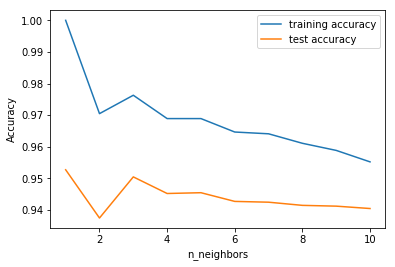

In [109]:
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")

plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

## 5.4. LOGISTIC REGRESSION

In [110]:
for i in [1, 5, 10]:
    print('C = ', i)
    logreg = LogisticRegression(random_state = 0, C = i, solver='lbfgs', max_iter = 5000, multi_class='auto')
    logreg = logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    print('\tLogistic Regression Accuracy:', accuracy_score(y_test, y_pred))
    print('\tLogistic Regression Precision:', precision_score(y_test, y_pred, average='weighted'))
    print('\tLogistic Regression Recall:', recall_score(y_test, y_pred, average='weighted'))

C =  1
	Logistic Regression Accuracy: 0.76275
	Logistic Regression Precision: 0.7642345681925508
	Logistic Regression Recall: 0.76275
C =  5
	Logistic Regression Accuracy: 0.762
	Logistic Regression Precision: 0.763446137105408
	Logistic Regression Recall: 0.762
C =  10
	Logistic Regression Accuracy: 0.76175
	Logistic Regression Precision: 0.7631483198592924
	Logistic Regression Recall: 0.76175
C =  30
	Logistic Regression Accuracy: 0.76225
	Logistic Regression Precision: 0.7635420607267491
	Logistic Regression Recall: 0.76225
C =  50
	Logistic Regression Accuracy: 0.7625
	Logistic Regression Precision: 0.7638707104103916
	Logistic Regression Recall: 0.7625
C =  100
	Logistic Regression Accuracy: 0.762
	Logistic Regression Precision: 0.7632276381696204
	Logistic Regression Recall: 0.762


In [111]:
logreg = LogisticRegression(penalty = 'l1', random_state = 0)
logreg = logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Logistic Regression Accuracy using l1 penalty:', accuracy_score(y_test, y_pred))
print('Logistic Regression Precision using l1 penalty:', precision_score(y_test, y_pred, average='weighted'))
print('Logistic Regression Recall using l1 penalty:', recall_score(y_test, y_pred, average='weighted'))

C:\Users\FisnikL\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\FisnikL\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Logistic Regression Accuracy using l1 penalty: 0.70475
Logistic Regression Precision using l1 penalty: 0.7089512089492616
Logistic Regression Recall using l1 penalty: 0.70475


In [112]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [113]:
print("X_train {}".format(X_train.shape))
print("y_train {}".format(y_train.shape))
print("X_test  {}".format(X_test.shape))
print("y_test  {}".format(y_test.shape))

X_train (16000, 15)
y_train (16000,)
X_test  (4000, 15)
y_test  (4000,)


In [114]:
logreg = LogisticRegression(random_state = 0)
logreg = logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Logistic Regression Accuracy with scaled data:', accuracy_score(y_test, y_pred))
print('Logistic Regression Precision with scaled data:', precision_score(y_test, y_pred, average='weighted'))
print('Logistic Regression Recall with scaled data:', recall_score(y_test, y_pred, average='weighted'))

C:\Users\FisnikL\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\FisnikL\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Logistic Regression Accuracy: 0.69525
Logistic Regression Precision: 0.6990161788591475
Logistic Regression Recall: 0.69525


## 5.5. SUPPORT VECTOR MACHINES - SVC

In [117]:
svc = SVC()
svc.fit(X,y)
y_pred = svc.predict(X_test)

C:\Users\FisnikL\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [118]:
print('SVC Accuracy:', accuracy_score(y_test, y_pred))
print('SVC Precision:', precision_score(y_test, y_pred, average='weighted'))
print('SVC Recall:', recall_score(y_test, y_pred, average='weighted'))

SVC Accuracy: 0.752
SVC Precision: 0.7768042468407608
SVC Recall: 0.752


## 5.6. NEURAL NETWORK

In [123]:
mlp = MLPClassifier(hidden_layer_sizes=(32))
mlp.fit(X, y)
y_pred = mlp.predict(X_test)
accuracy_score(y_test, y_pred)

C:\Users\FisnikL\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.81325

In [124]:
mlp = MLPClassifier(hidden_layer_sizes=(64))
mlp.fit(X, y)
y_pred = mlp.predict(X_test)

accuracy_score(y_test, y_pred)

C:\Users\FisnikL\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.8495

In [126]:
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter = 1000)
mlp.fit(X, y)
y_pred = mlp.predict(X_test)

accuracy_score(y_test, y_pred)

0.93925

In [127]:
mlp = MLPClassifier(hidden_layer_sizes=(128, 64, 32), max_iter = 10000)
mlp.fit(X, y)
y_pred = mlp.predict(X_test)

accuracy_score(y_test, y_pred)

0.9595